In [ ]:
!pip  install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [1]:
from tensorflow.keras.applications import * #Efficient Net included here
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import pandas as pd
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
import tensorflow as tf
#Use this to check if the GPU is configured correctly
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8970131691834473150
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14378926080
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12838812605169112689
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, ... up to  7
# Higher the number, the more complex the model is. and the larger resolutions it  can handle, but  the more GPU memory it will need
# loading pretrained conv base model
#input_shape is (height, width, number of channels) for images
conv_base = EfficientNetB6(weights="imagenet", include_top=False)

165234480/165234480 [==============================] - 3s 0us/step


In [3]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
# model.add(layers.Dropout(dropout_rate=0.2, name="dropout_out"))
NUMBER_OF_CLASSES= 23
model.add(layers.Dense(NUMBER_OF_CLASSES, activation="softmax", name="fc_out"))
conv_base.trainable = False

In [ ]:
# TRAIN_IMAGES_PATH='/content/drive/MyDrive/new_dataset/train'
# VAL_IMAGES_PATH='/content/drive/MyDrive/new_dataset/val'

# classes=['Chest', 'Others', 'Knee', 'Abdomen', 'Cervical Spine', 'Feet',
#        'Pelvis', 'Wrist', 'Lumbar Spine and Thoracic Spine', 'Hand and Wrist',
#        'Ankle', 'Shoulder', 'Lumbar Spine', 'Hand', 'Sinus', 'Elbow',
#        'Lower Leg', 'Hip', 'Finger', 'Thoracic Spine', 'Forearm',
#        'Abdomen and Chest', 'Skull']

# os.makedirs(TRAIN_IMAGES_PATH, exist_ok = True)
# os.makedirs(VAL_IMAGES_PATH, exist_ok = True)

# # Create directories for each class.
# for class_id in [x for x in range(len(classes))]:
#     os.makedirs(os.path.join(TRAIN_IMAGES_PATH, str(class_id)), exist_ok = True)
#     os.makedirs(os.path.join(VAL_IMAGES_PATH, str(class_id)), exist_ok = True)

In [4]:
classes=['Chest', 'Others', 'Knee', 'Abdomen', 'Cervical Spine', 'Feet',
       'Pelvis', 'Wrist', 'Lumbar Spine and Thoracic Spine', 'Hand and Wrist',
       'Ankle', 'Shoulder', 'Lumbar Spine', 'Hand', 'Sinus', 'Elbow',
       'Lower Leg', 'Hip', 'Finger', 'Thoracic Spine', 'Forearm',
       'Abdomen and Chest', 'Skull']

In [5]:
merged=pd.read_csv('/content/drive/MyDrive/new_dataset/merged.csv')

In [6]:
merged.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Filename,PhotometricInterpretation_x,BitsAllocated_x,SOPInstanceUID,Target_x,Label,Imagepath,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.65452...
1,1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.29960...
2,2,2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.37634...
3,3,3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.12781...
4,4,4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.47572...


In [7]:
from sklearn import preprocessing


In [8]:
le = preprocessing.LabelEncoder()

In [9]:
le.fit(classes)

LabelEncoder()

In [10]:
list(le.classes_)

['Abdomen',
 'Abdomen and Chest',
 'Ankle',
 'Cervical Spine',
 'Chest',
 'Elbow',
 'Feet',
 'Finger',
 'Forearm',
 'Hand',
 'Hand and Wrist',
 'Hip',
 'Knee',
 'Lower Leg',
 'Lumbar Spine',
 'Lumbar Spine and Thoracic Spine',
 'Others',
 'Pelvis',
 'Shoulder',
 'Sinus',
 'Skull',
 'Thoracic Spine',
 'Wrist']

In [11]:
encoded_array=le.transform(merged['Label'])

In [12]:
merged['encoded']=encoded_array

In [13]:
merged.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Filename,PhotometricInterpretation_x,BitsAllocated_x,SOPInstanceUID,Target_x,Label,Imagepath,...,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path,encoded
0,0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.65452...,4
1,1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.29960...,4
2,2,2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.37634...,4
3,3,3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.12781...,4
4,4,4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.47572...,4


In [14]:
print(le.transform(['Abdomen']))

[0]


In [ ]:


# Input_dir = '/content/drive/MyDrive/new_dataset'
# def preproccess_data(df, images_path):
#     for column, row in tqdm(df.iterrows(), total=len(df)):
#         class_id = row['Label']
#         shutil.copy(os.path.join(Input_dir, f"{row['Label']}/"+f"{row['SOPInstanceUID']}.png"), os.path.join(images_path, str(class_id)))
# df = pd.read_csv('/content/drive/MyDrive/new_dataset/merged.csv')
# df.head()
# #Split the dataset into 80% training and 20% validation
# df_train, df_valid = model_selection.train_test_split(df, test_size=0.2, random_state=42, shuffle=True,stratify=df.Label)
# #run the  function on each of them
# preproccess_data(df_train, TRAIN_IMAGES_PATH)
# preproccess_data(df_valid, VAL_IMAGES_PATH)

  0%|          | 0/1348 [00:00<?, ?it/s]


FileNotFoundError: ignored

In [16]:
df_train, df_valid = model_selection.train_test_split(merged, test_size=0.2, random_state=42, shuffle=True,stratify=merged.Label)

In [17]:
df_train.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Filename,PhotometricInterpretation_x,BitsAllocated_x,SOPInstanceUID,Target_x,Label,Imagepath,...,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path,encoded
1376,1376,1376,1376,E:/dataset/train\train\748\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75537417749251777157...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.75537...,0
144,144,144,144,E:/dataset/train\train\1109\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47124940692338562612...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.47124...,12
785,785,785,785,E:/dataset/train\train\294\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18966398494656266388...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.18966...,3
645,645,645,645,E:/dataset/train\train\188\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78547493856827312437...,12,Lower Leg,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.78547...,13
1608,1608,1608,1608,E:/dataset/train\train\931\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.44769667050882688681...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.44769...,0


In [ ]:
# f_path="/content/drive/MyDrive/new_body_parts/train/"
# main_path="/content/drive/MyDrive/png_body_parts/"
# for index, i in df_train.iterrows():
#     shutil.copy2(main_path+i['image_path'],f_path+str(i['encoded']))

In [ ]:
# f_path="/content/drive/MyDrive/new_body_parts/val/"
# main_path="/content/drive/MyDrive/png_body_parts/"
# for index, i in df_valid.iterrows():
#     shutil.copy2(main_path+i['image_path'],f_path+str(i['encoded']))

In [ ]:
# print(le.transform(['Others']))

[16]


In [18]:
TRAIN_IMAGES_PATH="/content/drive/MyDrive/new_body_parts/train/"
VAL_IMAGES_PATH="/content/drive/MyDrive/new_body_parts/val/"


In [19]:
height=512
width=512

In [20]:
# I love the  ImageDataGenerator class, it allows us to specifiy whatever augmentations we want so easily...
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
# Note that the validation data should not be augmented!
#and a very important step is to normalise the images through  rescaling
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    TRAIN_IMAGES_PATH,
    # All images will be resized to target height and width.
    target_size=(height, width),
    batch_size=64,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode="categorical",
)
validation_generator = test_datagen.flow_from_directory(
    VAL_IMAGES_PATH,
    target_size=(height, width),
    class_mode=None,
    batch_size=1,
    shuffle=False,
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"],
)

Found 1348 images belonging to 23 classes.
Found 338 images belonging to 23 classes.


In [21]:
epochs=2

In [22]:
y_test= validation_generator.classes

In [23]:
y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=1348// 64,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=True,
    workers=4,
)

<ipython-input-24-fd0a87ed45f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
21/21 [==============================] - 132s 4s/step - loss: 15.5327 - acc: 0.0086
Epoch 2/2
21/21 [==============================] - 99s 4s/step - loss: 4.6561 - acc: 0.2609


In [25]:
y_pred = model.predict(validation_generator)

338/338 [==============================] - 96s 262ms/step


In [26]:
# Import the modules from `sklearn.metrics` 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report# Confusion matrix 

In [27]:
import numpy as np

In [28]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [29]:
cm=confusion_matrix(y_test, y_pred_classes) 

In [30]:
print(cm)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  22
    0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 

In [31]:
import sklearn
cm=sklearn.metrics.confusion_matrix(y_test,y_pred_classes)
print(cm)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  22
    0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 

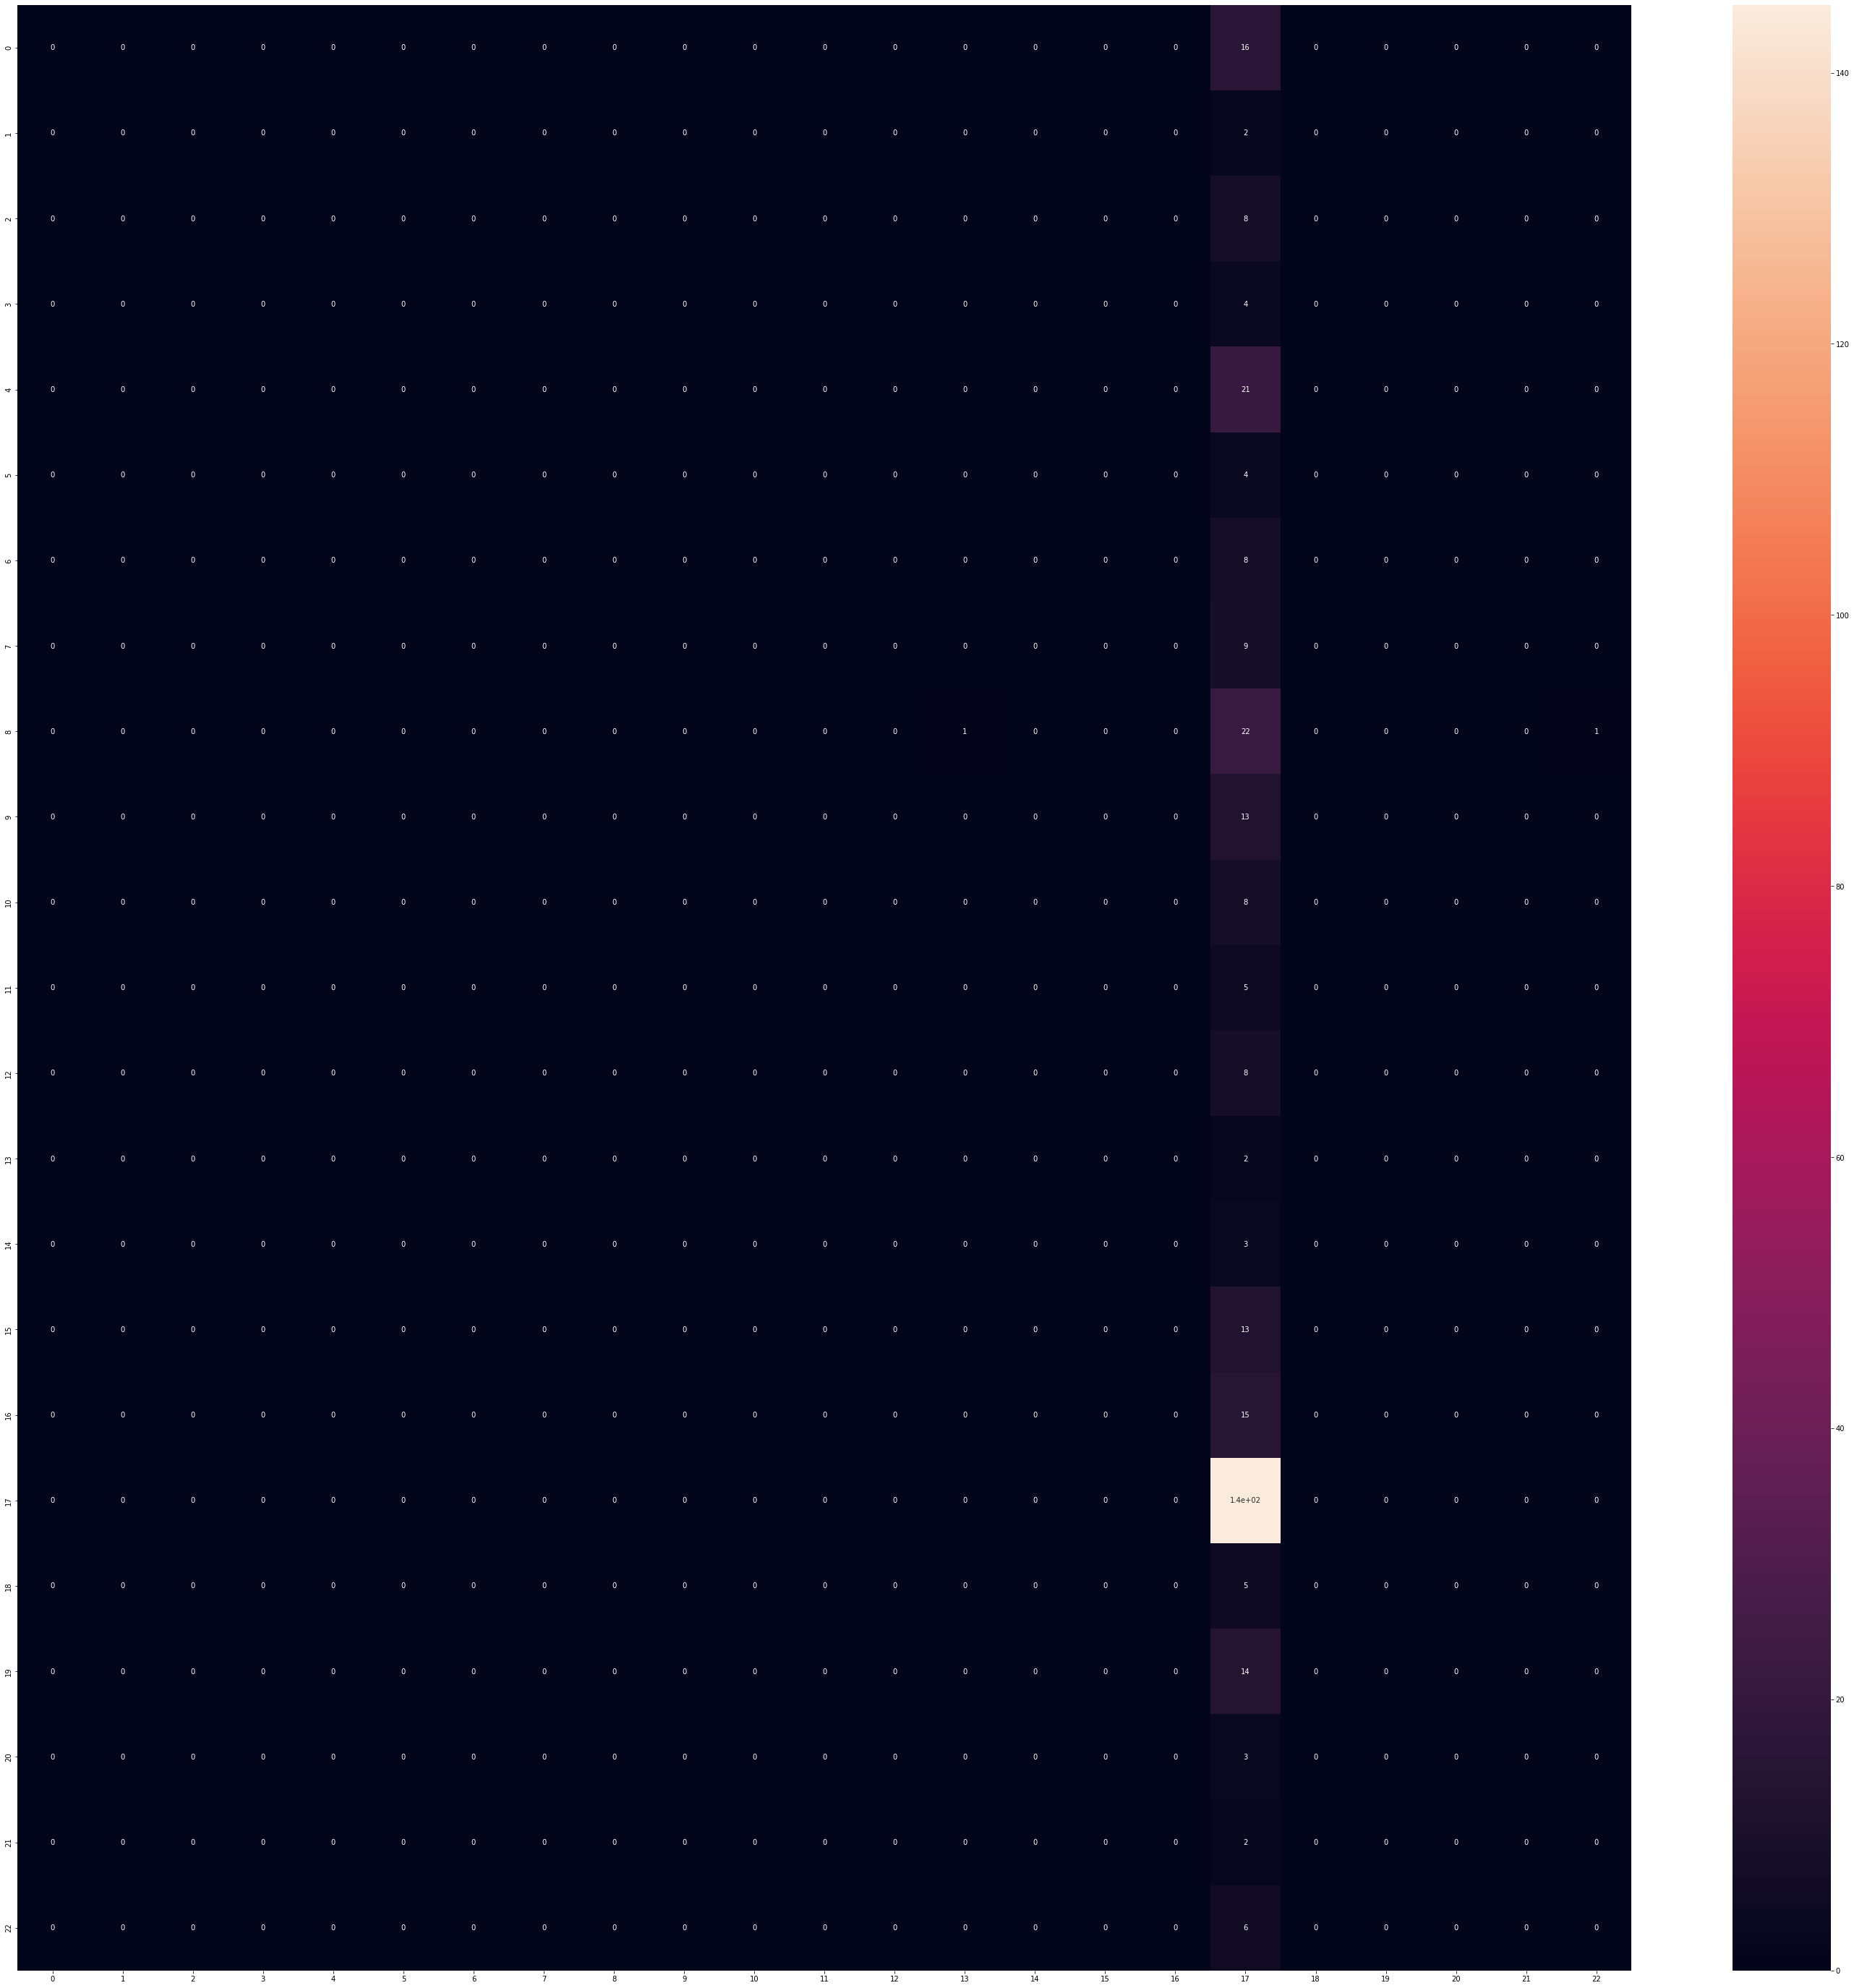

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cm, range(23), range(23))
plt.figure(figsize=(50,50))

sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [33]:
print(sklearn.metrics.classification_report(y_test, y_pred_classes) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        15
          17       0.43    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
classes

['Chest',
 'Others',
 'Knee',
 'Abdomen',
 'Cervical Spine',
 'Feet',
 'Pelvis',
 'Wrist',
 'Lumbar Spine and Thoracic Spine',
 'Hand and Wrist',
 'Ankle',
 'Shoulder',
 'Lumbar Spine',
 'Hand',
 'Sinus',
 'Elbow',
 'Lower Leg',
 'Hip',
 'Finger',
 'Thoracic Spine',
 'Forearm',
 'Abdomen and Chest',
 'Skull']

In [35]:
le.transform(classes)

array([ 4, 16, 12,  0,  3,  6, 17, 22, 15, 10,  2, 18, 14,  9, 19,  5, 13,
       11,  7, 21,  8,  1, 20])